In [1]:
from src.training.training import train_model, train_and_save, load_model
from src.models.get_data import get_tensors
from src.visualization.brier_score import make_brier_skill_plot
from src.visualization.plot_forecasts import plot_weight_mixture
import numpy as np
import tensorflow as tf

2024-04-16 12:03:38.145409: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 12:03:38.171402: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 12:03:38.171426: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 12:03:38.172124: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-16 12:03:38.176203: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 12:03:38.176669: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
forecast_distribution = 'distr_mixture_linear'
distribution_1 = 'distr_trunc_normal'
distribution_2 = 'distr_log_normal'

loss = 'loss_twCRPS_sample' # options: loss_CRPS_sample, loss_twCRPS_sample, loss_log_likelihood

chain_function = 'chain_function_normal_cdf_plus_constant' # options: chain_function_normal_cdf, chain_function_indicator, chain_function_normal_cdf_plus_constant
chain_function_mean = 13
chain_function_std = 1
chain_function_threshold = 15 # 12 / 15
chain_function_constant = 0.2

optimizer = 'Adam'
learning_rate = 0.03
folds = [1,2]
neighbourhood_size = 11
ignore = ['229', '285', '323']
epochs = 600

#parameters = {'weight_a': tf.constant([1.54], dtype=tf.float32), 'weight_b': tf.constant([-0.15], dtype=tf.float32)}

samples = 100
printing = False
pretrained = True
random_init = True

all_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

location_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

scale_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

In [3]:
models = {} 
for i in range(0, 10):
    model = train_model(
    forecast_distribution,
    loss,
    optimizer,
    learning_rate,
    folds,
    all_features,
    location_features,
    scale_features,
    neighbourhood_size,
    ignore,
    epochs,

    chain_function = chain_function,
    chain_function_mean = chain_function_mean,
    chain_function_std = chain_function_std,
    chain_function_constant = chain_function_constant,
    chain_function_threshold = chain_function_threshold,
    samples = samples,
    printing = printing,
    distribution_1 = distribution_1,
    distribution_2 = distribution_2,
    pretrained = pretrained,
    random_init = random_init,
    )
    models[str(i)] = model
    print("Done with model " + str(i))

Using random initialization for Truncated Normal distribution
Using random initialization for Log Normal distribution
Final loss:  0.22334185
Final loss:  0.22834387
Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using default weight parameters for weights in Mixture Linear distribution
Final loss:  0.22070977
Done with model 0
Using random initialization for Truncated Normal distribution
Using random initialization for Log Normal distribution
Final loss:  0.23199604
Final loss:  0.2229885
Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using default weight parameters for weights in Mixture Linear distribution
Final loss:  0.22236963
Done with model 1
Using random initialization for Truncated Normal distribution
Using random initialization for Log Normal distribution
Final loss:  0.23197846
Final loss:  0.22687675
Using given parameters for Truncated Normal distribut

In [4]:

test_fold = 3
ignore = ['229', '285', '323']
X_test, y_test = get_tensors(neighbourhood_size, all_features, test_fold, ignore)
X_test = models['0'].normalize_features(X_test)

In [5]:
folder = '/net/pc200239/nobackup/users/hakvoort/models/emos/'

base_model = load_model(folder + 'trunc_normal/tn_crps__epochs600_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

best_model = load_model(folder + 'mixture_linear/ml_tn_ln_twcrps_mean13.0_std2.0_constant0.07000000029802322_epochs600_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

models['best_model'] = best_model

Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using given weight parameters for weights in Mixture Linear distribution


In [9]:
for name, model in models.items():
    print("CRPS: ", model.CRPS(X_test, y_test, 10000))

CRPS:  tf.Tensor(0.8875551, shape=(), dtype=float32)
CRPS:  tf.Tensor(0.8896117, shape=(), dtype=float32)
CRPS:  tf.Tensor(0.8867799, shape=(), dtype=float32)
CRPS:  tf.Tensor(0.88673013, shape=(), dtype=float32)
CRPS:  tf.Tensor(0.8862636, shape=(), dtype=float32)
CRPS:  tf.Tensor(0.8866646, shape=(), dtype=float32)
CRPS:  tf.Tensor(0.88801914, shape=(), dtype=float32)
CRPS:  tf.Tensor(0.8893677, shape=(), dtype=float32)
CRPS:  tf.Tensor(0.8864148, shape=(), dtype=float32)
CRPS:  tf.Tensor(0.8878067, shape=(), dtype=float32)
CRPS:  tf.Tensor(0.88589704, shape=(), dtype=float32)


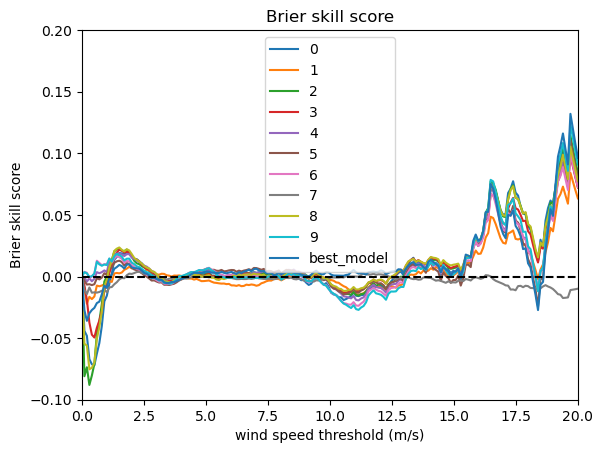

In [8]:

values = np.linspace(0, 20, 200)
make_brier_skill_plot(base_model, models, X_test, y_test, values, ylim=[-0.1,0.2])

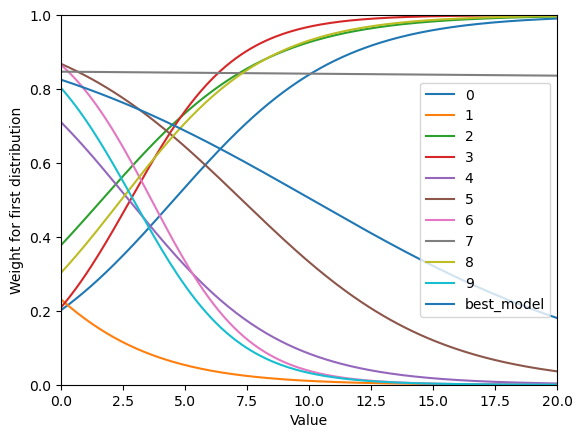

In [7]:

values = np.linspace(0, 20, 200)

plot_weight_mixture(models, values)

In [10]:
chain_function_constant = 0.4
models_2 = {} 
for i in range(0, 10):
    model = train_model(
    forecast_distribution,
    loss,
    optimizer,
    learning_rate,
    folds,
    all_features,
    location_features,
    scale_features,
    neighbourhood_size,
    ignore,
    epochs,

    chain_function = chain_function,
    chain_function_mean = chain_function_mean,
    chain_function_std = chain_function_std,
    chain_function_constant = chain_function_constant,
    chain_function_threshold = chain_function_threshold,
    samples = samples,
    printing = printing,
    distribution_1 = distribution_1,
    distribution_2 = distribution_2,
    pretrained = pretrained,
    random_init = random_init,
    )
    models_2[str(i)] = model
    print("Done with model " + str(i))

Using random initialization for Truncated Normal distribution
Using random initialization for Log Normal distribution
Final loss:  0.4039964
Final loss:  0.4534247
Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using default weight parameters for weights in Mixture Linear distribution
Final loss:  0.39978746
Done with model 0
Using random initialization for Truncated Normal distribution
Using random initialization for Log Normal distribution
Final loss:  0.47864664
Final loss:  0.45179984
Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using default weight parameters for weights in Mixture Linear distribution
Final loss:  0.40155247
Done with model 1
Using random initialization for Truncated Normal distribution
Using random initialization for Log Normal distribution
Final loss:  0.40701082
Final loss:  0.40981096
Using given parameters for Truncated Normal distributi

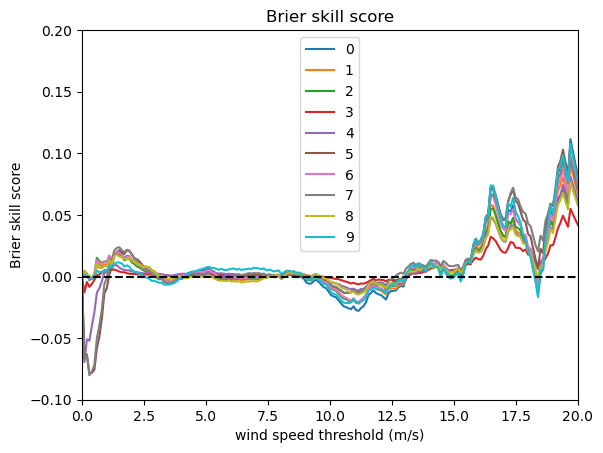

In [11]:
make_brier_skill_plot(base_model, models_2, X_test, y_test, values, ylim=[-0.1,0.2])

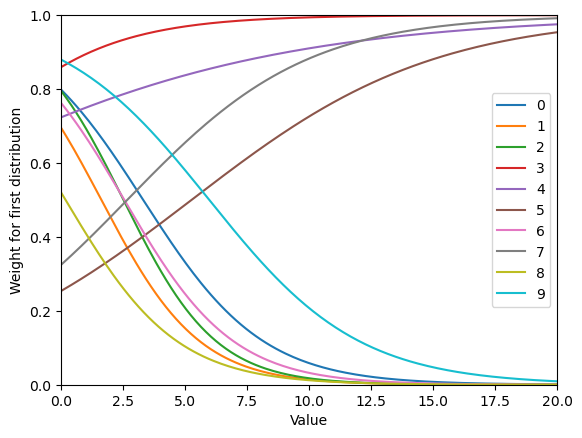

In [12]:
plot_weight_mixture(models_2, values)

In [13]:
chain_function_constant = 0.6
models_3 = {}
for i in range(0, 10):
    model = train_model(
    forecast_distribution,
    loss,
    optimizer,
    learning_rate,
    folds,
    all_features,
    location_features,
    scale_features,
    neighbourhood_size,
    ignore,
    epochs,

    chain_function = chain_function,
    chain_function_mean = chain_function_mean,
    chain_function_std = chain_function_std,
    chain_function_constant = chain_function_constant,
    chain_function_threshold = chain_function_threshold,
    samples = samples,
    printing = printing,
    distribution_1 = distribution_1,
    distribution_2 = distribution_2,
    pretrained = pretrained,
    random_init = random_init,
    )
    models_3[str(i)] = model
    print("Done with model " + str(i))

Using random initialization for Truncated Normal distribution
Using random initialization for Log Normal distribution
Final loss:  0.58952874
Final loss:  0.58849967
Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using default weight parameters for weights in Mixture Linear distribution
Final loss:  0.5789795
Done with model 0
Using random initialization for Truncated Normal distribution
Using random initialization for Log Normal distribution
Final loss:  0.648092
Final loss:  0.6240726
Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using default weight parameters for weights in Mixture Linear distribution
Final loss:  0.5819208
Done with model 1
Using random initialization for Truncated Normal distribution
Using random initialization for Log Normal distribution
Final loss:  0.6255612
Final loss:  0.5879557
Using given parameters for Truncated Normal distribution
Us

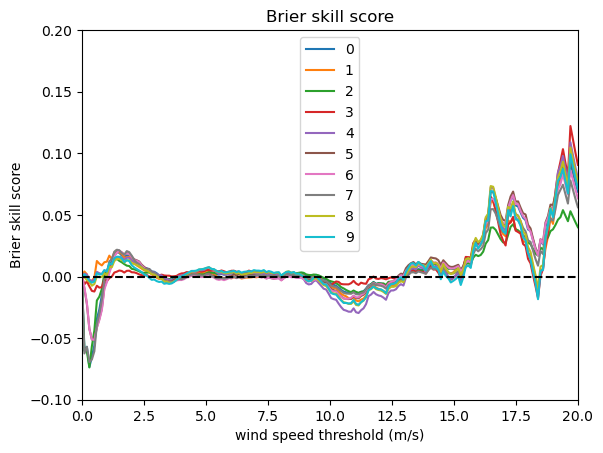

In [15]:
make_brier_skill_plot(base_model, models_3, X_test, y_test, values, ylim=[-0.1,0.2])

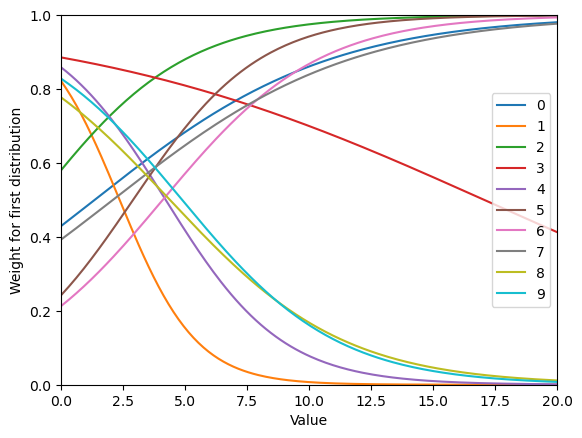

In [14]:
plot_weight_mixture(models_3, values)